 
* [Hypothesis Testing](#hypothesis_testing)
    * [Steps of Hypothesis Testing](#steps_hypothesis_testing)
    * [p-value](#p_value)
    * [Type I error - false positive](#type_1_error)
    * [Type II error - false negative](#type_2_error)
    * [Power of a Test](#power_of_test)
* [Tests of means of numerical data](#tests_numerical_data)
    * [Example 1: One-sample Student's t-test](#one_sample_t_test)
    * [Example 2: Two-sample Student's t-test](#two_sample_t_test)
    * [Example 3: One-way ANOVA (balanced)](#one_way_anova)
    * [Example 4: Two-way ANOVA (balanced, with interactions)](#two_way_anova)
* [Tests of frequencies of categorical data](#tests_categorical_data)
    * [Example 1: One-way Pearson Chi-Square test - goodness of fit](#one_way_chi2)
    * [Example 2: Two-way Pearson Chi-Square test - test of independence](#two_way_chi2_independence)
    * [Example 3: Two-way Pearson Chi-Square test - test for homogeneity](#two_way_chi2_homogeneity)
* [Statistical modeling for hypothesis testing](#statistical_modeling_for_hypothesis_testing)
    * [Example 1: Linear Regression for Two-sample Student's t-test](#linear_regression_t_test)
    * [Example X: Generalised Linear Model Hypothesis Testing: TODO](#glm_t_test)
    * [Example XX: Linear Regression for One-way ANOVA: TODO](#linear_regression_anova)
* [Confidence Interval](#confidence_interval)




### Hypothesis Testing <a class="anchor" id="hypothesis_testing"></a>

In **Frequentist approach**, we use maximum likelihood estimation (MLE) as a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.

Frequentists don’t treat the uncertainty in the true parameter value probabilistically. However, they handle uncertainty by limiting the long-term error rates, either by **comparing the estimated parameter against a null value (NHST)**, or by calculating **confidence intervals**.

wiki - maximum likelihood\
https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/

### Steps of Hypothesis Testing <a class="anchor" id="steps_hypothesis_testing"></a>

<ol>
<li> A <b>random sample</b> is drawn from the population.</li>
<li> A <b>null hypothesis</b> is formulated for the population (ex. there is null difference between the population mean and the value 110).</li>
<li> A <b>test-statistic</b> is calculated, of which we know the probability distribution. A test-statistic is a quantity derived from the sample, a numerical summary of a data-set that reduces the data to one value. An important property of a test statistic is that <b>its sampling distribution under the null hypothesis must be calculable</b>. If an arbitrarily large number of samples, each involving multiple observations (data points), were separately used in order to compute one value of a statistic (such as, for example, the sample mean or sample variance) for each sample, then the sampling distribution is the probability distribution of the values that the statistic takes on. In many contexts, only one sample is observed, but the sampling distribution can be found theoretically. Note, the test-statistics will have a dependency on the sample size (abm).</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance, if we assume the null hypothesis as true. This is the <b>p-value</b>.</li>
    <li> If <b>$p <\alpha $ </b> (where $\alpha$ is the <b> significance level </b>, typically $\alpha = 0.05$), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>    

Hypothesis testing aims to **reduce the long-term error rates**: if I repeat the experiment many times with many different random samples (infinite times), only $\alpha$% of times I will wrongly reject the null hypothesis. 

*Book: An Introduction to Statistics with Python*\
*wiki - Test statistic \
*wiki - Sampling distribution \
https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/

### p-value <a class="anchor" id="p_value"></a>

A value of $p < \alpha$ for the null hypothesis has to be interpreted as follows: If the null hypothesis is true, **the chance to find a test statistic as extreme as or more extreme than the one observed is less than $\alpha$**. Typically $\alpha$ is set to 0.05, which means that if the null hypothesis is true, the chance to find a test statistic as extreme as or more extreme than the one observed is less than 5%.\
This is not the same as saying that the null hypothesis is false, and even less so that an alternative hypothesis is true!

Book: An Introduction to Statistics with Python

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"Warning message in is.na(x):
"is.na() aplicado a un objeto que no es (lista o vector) de tipo 'expression"

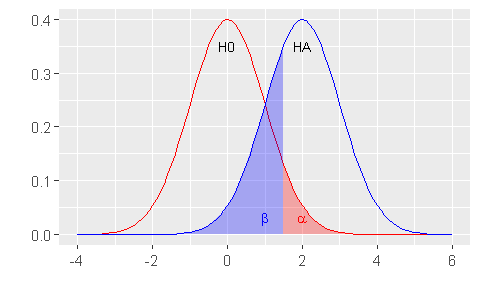

In [4]:
sigma <- 1
mu <- 0
bounds <- c(mu-3*sigma, mu+3*sigma)

lower.alpha.x <- 1.5
upper.alpha.x <- 4
step <- (upper.alpha.x - lower.alpha.x) / 100
cord.alpha.x <- c(lower.alpha.x,seq(lower.alpha.x,upper.alpha.x,step),upper.alpha.x)
cord.alpha.y <- c(0,dnorm(seq(lower.alpha.x,upper.alpha.x,step),mu,sigma),0)
poligono.alpha <- data.frame(cord.alpha.x,cord.alpha.y)

lower.beta.x <- -4
upper.beta.x <- lower.alpha.x
step <- (upper.beta.x - lower.beta.x) / 100
cord.beta.x <- c(lower.beta.x,seq(lower.beta.x,upper.beta.x,step),upper.beta.x)
cord.beta.y <- c(0,dnorm(seq(lower.beta.x,upper.beta.x,step),mu+2,sigma),0)
poligono.beta <- data.frame(cord.beta.x,cord.beta.y)

# curve(dnorm(x,mu,sigma),xlim=bounds) 
# polygon(cord.x,cord.y,col='skyblue')

library(ggplot2)
options(repr.plot.width=4, repr.plot.height=2.5)
ggplot(data.frame(x = c(-4, 6)), aes(x)) + 
  stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), col='red') +
  stat_function(fun = dnorm, args = list(mean = mu+2, sd = sigma), col='blue') +
  geom_polygon(data=poligono.alpha, mapping=aes(x=cord.alpha.x, y=cord.alpha.y),fill='red', alpha=0.3) +
  geom_polygon(data=poligono.beta, mapping=aes(x=cord.beta.x, y=cord.beta.y),fill='blue', alpha=0.3) +
  annotate("text", label = expression(alpha), x = 2, y = 0.03, size = 3, colour = "red") +
  annotate("text", label = expression(beta), x = 1, y = 0.03, size = 3, colour = "blue") + 
  annotate("text", label = "H0", x = 0, y = 0.35, size = 3) +
  annotate("text", label = "HA", x = 2, y = 0.35, size = 3) + xlab("") + ylab("") 
#   stat_function(fun = dnorm, args = list(mean = mu+1, sd = sigma, col='blue')

### Type I error - false positive <a class="anchor" id="type_1_error"></a>

We wrongly reject the null hypothesis. The null hypothesis is true, but we reject it.\
We set a threshold $p < \alpha$ for rejecting the null hypothesis, where **$\alpha$ is called the significance level**. Therefore **there is a $\alpha$ probability of wrongly rejecting it (abm)**.
If we assign the value of $\alpha =0.05$, there is a 5% probability of wrongly rejecting it (abm).

wiki - Type I and type II errors

### Type II error - false negative <a class="anchor" id="type_2_error"></a>

We don't reject the null hypothesis even if we should reject it. The null hypothesis is false but we find $p > \alpha$. \
**Given an alternative hypothesis $H_{A}$, if we assume that this is the true hypothesis, the probability of rejecting it even if it is true is $\beta$.** \
The chance of correctly rejecting the null hypothesis (and accept the alternative one) is $1 - \beta$ (**power of the test**).

### Power of a Test <a class="anchor" id="power_of_test"></a>

The **power o sensitivity** of a hypothesis test is the **probability that the test rejects the null hypothesis $H_{0}$ when a specific alternative hypothesis $H_{A}$ is true**. To estimate this value, **we need to have defined an alternative hypothesis $H_{A}$**.

Given an alternative hypothesis $H_{A}$:
- $\beta*100$ is the chance of wrongly accepting the null hypothesis.
- $(1-\beta)*100$ is the chance of correctly rejecting the null hypothesis. This is the **power** of the test.

Book: An Introduction to Statistics with Python \
wiki - Power of a test \
Check here for some examples:\
https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html \
https://www.r-bloggers.com/2017/07/power-analysis-and-sample-size-calculation-for-agriculture/

### Tests of means of numerical data <a class="anchor" id="tests_numerical_data"></a>

In this section we consider the most common hypotesis testing techniques that compare the **mean of a numerical variable across groups**. More specifically:

<l>
<li>Comparison of the mean for one group with a fixed value. </li>
<li>Comparison of the means of two groups. </li>
<li>Comparison of the means of three or more groups. </li>    
</l>

In case the data are normally distributed (or approximately) we can use the so-called *parametric tests*. If the data are not normally distributed, the corresponding *non-parametric test* should be used.  

Book: An Introduction to Statistics with Python

#### Example 1: One-sample Student's t-test <a class="anchor" id="one_sample_t_test"></a>

The **one sample t-test** is a statistical procedure used to **determine whether a sample of observations could have been generated by a process with a specific mean $m_{0}$**. It assumes a population with normal distribution $N(\mu, \sigma)$.

The alternative hypothesis assumes that some difference exists between the true mean ($\mu$) and the comparison value ($m_{0}$), whereas the null hypothesis assumes that no difference exists.

<ol>
<li> We have a random sample of n elements $x_{i}$ taken from the population. </li>
<li> Null hypothesis $H_{0}: \mu=m_{0}$.</li>
<li> From the observed sample data we calculate the test-statistic
    $t = \frac{\bar{x}-m_{0}}{s/\sqrt{n}}$, where $\bar{x}$ is the sample mean and s is the sample standard deviation, 
    $\bar{x}=\frac{\sum_{i}^{n}x_{i}}{n}$, $s^{2}=\frac{\sum_{i}^{n}(x_{i}- {{\bar{x}}})^2}{n-1}$. If we assume the null hypothesis, i.e. the sample is randomly taken from the normal distribution $N(m_{0},\sigma)$, then the statistic <b>t will follow a t-Student distribution with n-1 degrees of freedom</b>.   
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  

<br />
The one sample t-test has four main assumptions:

- The dependent variable must be continuous (interval/ratio).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.

wiki - Student's t-distribution\
Book: An Introduction to Statistics with Python\
https://www.statisticssolutions.com/manova-analysis-one-sample-t-test/

**Numerical example**

You want to compare the notes of 10 students to the national average of 110.\
Question: is the mean values of the notes significally higher than the national average?

Book: An Introduction to Statistics with Python, p.126

Null hypothesis: there is no difference between the population mean $\mu$ and the value 110.\
$H_{0}: \mu = 110$

In [4]:
notes <- c(109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1)
n <- length(notes)
x_mean <- mean(notes)
s2 <- sum((notes-x_mean)^2)/(n-1)
t <- (x_mean-110)/(sqrt(s2)/sqrt(n))

In [13]:
t # t value measured from our sample

[1] -1.836025

In [17]:
t_test <- t.test(notes, mu =110)

In [20]:
t_test
t_test$statistic
t_test$p.value


	One Sample t-test

data:  notes
t = -1.836, df = 9, p-value = 0.09954
alternative hypothesis: true mean is not equal to 110
95 percent confidence interval:
  81.25062 112.98938
sample estimates:
mean of x 
    97.12 


t 
-1.836025

[1] 0.09953844

The probability of having obtained our random sample out of a normal population centered in 110 is 9.95%. Since this value is higher than our threshold of 5%, we cannot reject the null hypothesis. It means that there is no statistically significant difference between the real population mean and 110 or in other words the observed value of 97.1 is not significantly different from 110.

#### Example 2: Two-sample Student's t-test <a class="anchor" id="two_sample_t_test"></a>

The **two sample Student's t-test** is a statistical procedure used to **compare two groups of observations**. The goal is to determine if both groups could have been generated by the **same process with the same mean**. It assumes populations with normal distribution $N(\mu_{1}, \sigma_{1})$ and $N(\mu_{2}, \sigma_{2})$.

The alternative hypothesis assumes that some difference exists between the two mean values $\mu_{1} \neq \mu_{2}$, whereas the null hypothesis assumes that no difference exists $\mu_{1}=\mu_{2}$.

<ol>
<li> We have two random samples: $n_{1}$ elements $x_{1i}$ taken from group 1 and $n_{2}$ elements $x_{2i}$ taken from group 2. </li>
<li> Null hypothesis $H_{0}: \mu_{1}=\mu_{2}$.</li>
<li> From the observed sample data we calculate the <b> test-statistic
    $t = \frac{\bar{x}_{1}-\bar{x}_{2}}{s_{\bar{\Delta}}}$ </b>, where $\bar{x}_{1}$ is the sample mean of group 1, $\bar{x}_{2}$ is the sample mean of group 2 and $s_{\bar{\Delta}}$ is the standard deviation of the difference between the samples means. Explicitely 
    $\bar{x}_{1}=\frac{\sum_{i}^{n1}x_{1i}}{n1}$, $\bar{x}_{2}=\frac{\sum_{i}^{n2}x_{2i}}{n2}$, $s_{\bar{\Delta}}^{2}=\frac{s^{2}_{1}}{n1}+\frac{s^{2}_{2}}{n2}$, where $s^{2}_{1}=\frac{\sum_{i}^{n1}(x_{1i}- {{\bar{x}_{1}}})^2}{n1-1}$ and $s^{2}_{2}=\frac{\sum_{i}^{n2}(x_{2i}- {{\bar{x}_{2}}})^2}{n2-1}$ are the variances of groups 1 and 2.
    If we assume the null hypothesis, i.e. the two samples are randomly taken from normal distributions with the same mean, then the statistic <b>t can be approximated as an ordinary Student's t-distribution with the degrees of freedom calculated using: check Welch's t-test</b>.   
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  

<br />
The two samples t-test has these main assumptions:

- normally distributed
- independent groups


wiki - Student's t-test\
Book: An Introduction to Statistics with Python\
C.Sala Notes

**Numerical Example**

We want to compare the performance measurements of a racing team on two occasions: race1 and race2.\
Question: is the preformance in race2 significantly better than in race1?

Book: An Introduction to Statistics with Python, p.144

In [78]:
race1_scores <- c(79, 100, 93, 75, 84, 107, 66, 86, 103, 81, 83, 89, 105, 84, 86, 86, 112, 112, 100, 94)
race2_scores <- c(92, 100, 76, 97, 72, 79, 94, 71, 84, 76, 82, 57, 67, 78, 94, 83, 85, 92, 76, 88)

In [79]:
s2 <- var(race1_scores)/length(race1_scores)+var(race2_scores)/length(race2_scores)

In [80]:
t <- (mean(race1_scores)-mean(race2_scores))/sqrt(s2)

In [81]:
t

[1] 2.434756

In [82]:
t_test <- t.test(race1_scores, race2_scores)
t_test


	Welch Two Sample t-test

data:  race1_scores and race2_scores
t = 2.4348, df = 37.3, p-value = 0.0198
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  1.529079 16.670921
sample estimates:
mean of x mean of y 
    91.25     82.15 


The probability that the two random samples are taken from normal populations centered around the same mean is 1.98%. Since this value is lower than our threshold of 5%, we can reject the null hypothesis. It means that there is statistically significant difference between the two groups populations means.

In [83]:
n1 <- length(race1_scores)
n2 <- length(race2_scores)
n1 == n2
sd1 <- sd(race1_scores)
sd2 <- sd(race2_scores)
sd <- mean(c(sd1,sd2))
sd
delta <- mean(race1_scores)-mean(race2_scores)
delta

[1] TRUE

[1] 11.79125

[1] 9.1

In [84]:
# calculate power of the test
power.t.test(n = n1, delta = delta, sd = sd, sig.level = 0.05,
             power = NULL,
             type = "two.sample",
             alternative = "two.sided")


     Two-sample t test power calculation 

              n = 20
          delta = 9.1
             sd = 11.79125
      sig.level = 0.05
          power = 0.6622166
    alternative = two.sided

NOTE: n is number in *each* group


There is a 66% chance of correctly rejecting the null hypothesis, assuming that the magnitude of the effect we observe is true.

In [85]:
power.t.test(n = NULL, delta = delta, sd = sd, sig.level = 0.05,
             power = 0.8,
             type = "two.sample",
             alternative = "two.sided")


     Two-sample t test power calculation 

              n = 27.35009
          delta = 9.1
             sd = 11.79125
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


We would need 27 observations per group to correctly reject the null hypothesis with a 80% probability (assuming the effect size we observe is true).

In [97]:
## Alternative library for calculating power of t test
library(pwr)

## Cohen effect size d
d <- delta/sd

pwr.t.test(d = d, n = n1, sig.level = 0.05)

## https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html


     Two-sample t test power calculation 

              n = 20
              d = 0.7717587
      sig.level = 0.05
          power = 0.6622237
    alternative = two.sided

NOTE: n is number in *each* group


#### Example 3: One-way ANOVA (balanced) <a class="anchor" id="one_way_anova"></a>

**ANOVA (Analysis of Variance)** is a statistical test used to **analyze the difference between the means of more than two groups**.\
The **one-way ANOVA** is a statistical procedure used to assess whether the means of a quantitative variable within several pre-defined groups differ from each other. It assumes that all samples are drawn from **normally distributed populations with equal variances**, $N(\mu_{i}, \sigma)$ . Also it's quite important to have exactly the **same number of samples in each analysis group (balanced ANOVA)**.\
The name **one-way** refers to the fact that we are considering only one variable that distinguish between different groups: this variable is usually called *factor* or *treatment*. If the test is including also another variable, it is reffered as *two-way ANOVA*. For example, if we compare a group with No treatment, another with treatment A and a third one with treatment B, we will perform one-way ANOVA. If we want to distinguish between man and women (factors: treatment and gender) we will perform a two-way ANOVA.\
For comparison between two groups the t-test leads to exactly the same result as the one-way ANOVA.

The one-way ANOVA can be used to assess whether any of the treatments is on average superior, or inferior, to the others versus the null hypothesis that all treatments yield the same mean response. This is an **example of an *omnibus* test, meaning that a single test is performed to detect any of several possible differences**. Alternatively, we could carry out pairwise tests among the treatments (for instance, in the medical trial example with four treatments we could carry out six tests among pairs of treatments). The disadvantage of the one-way ANOVA is that if we reject the null hypothesis, we do not know which treatments can be said to be significantly different from the others.

The alternative hypothesis assumes that some difference exists between the mean values of the groups, whereas the null hypothesis assumes that no difference exists.

<ol>
<li> We have $n_{groups}$ random samples each one with the same number $n$ of elements (<i>balanced</i> ANOVA). </li>
<li> Null hypothesis $H_{0}: \mu_{1}=\mu_{2}= ...=\mu_{n_{groups}}$.</li>
<li> From the observed samples data we calculate the <b> F-test statistic
    $F = \frac{variance-between-treatments}{variance-within-treatments} =\frac{SS_{treatments}/DF_{treatments}}{SS_{error}/DF_{errors}}=\frac{MS_{treatments}}{MS_{error}} = \frac{SS_{treatments}/(n_{groups}-1)}{SS_{error}/(n_{total}-n_{groups})}$ </b>, where the summation is called the sum of squares (SS), the divisor is called the degrees of freedom (DF) and the result is called the mean square (MS). These values are related by the following equivalences: $SS_{total} = SS_{error} + SS_{treatments}$ and $DF_{total} = DF_{error}+DF_{treatments}$.<br>
Explicitely, $SS_{total} =\sum_{j}^{n_{groups}}\sum_{i}^{n}(x_{ij}- {{\bar{x}_{total}}})^2 $ is the total sum of squares based on all the observation deviations from the grand mean, $SS_{error} =\sum_{j}^{n_{groups}}\sum_{i}^{n}(x_{ij}- {{\bar{x}_{j}}})^2 $ is based on all the observation deviations from their group mean, $SS_{treatments} =n\sum_{j}^{n_{groups}}(\bar{x}_{j}-\bar{x}_{total})^2 $ is based on the deviations of treatment means from the grand mean, the result being multipied by the number n of observations in each treatment to account for the difference between the variance of observations and variance of means. Regarding the degrees of freedom, they follow the equations: $DF_{total}= n_{total}-1$, $DF_{treatments}= n_{groups}-1$ and $DF_{error}= n_{total}-n_{groups}$. <br>
<b>The ANOVA test is based on a comparison of the observed variation between the groups with the observed variability within the groups.</b><br> 
If we assume the null hypothesis ($H_{0}: \mu_{1}=\mu_{2}= ...=\mu_{n_{groups}}$), then the statistic <b>F will follow a F-distribution</b>.   
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  

<br />
The one-way ANOVA stands on these main assumptions:

- independence of observations.
- normality – the distributions of the residuals are normal.
- equality (or "homogeneity") of variances, called homoscedasticity — the variance of data in groups should be the same.
- same number of samples in each analysis group (*balanced* ANOVA).
- no significant outliers in any cell of the design.

Book: An Introduction to Statistics with Python\
wiki - Analysis of variance\
wiki - F-test

**Numerical Example**

We use the built-in R data set named PlantGrowth. It contains the weight of plants obtained under a control and two different treatment conditions. It consists of 30 observations, 10 per group (control, treatment 1 and treatment 2).

Question: is there significant difference in the mean of the three groups?\
Here we assume that we have done all the necessary tests for checking normality and homoscedasticity conditions.

https://www.datanovia.com/en/lessons/anova-in-r/ \
https://www.thoughtco.com/example-of-an-anova-calculation-3126404

In [2]:
library(tidyverse)
library(dplyr)
library(ggpubr)
library(rstatix)
data("PlantGrowth")

In [3]:
data("PlantGrowth")
dim(PlantGrowth)
levels(PlantGrowth$group)

[1] 30  2

[1] "ctrl" "trt1" "trt2"

In [14]:
stats_groups <- PlantGrowth %>%
  group_by(group) %>%
  get_summary_stats(weight, type = "mean_sd")
stats_groups

group,variable,n,mean,sd
ctrl,weight,10,5.032,0.583
trt1,weight,10,4.661,0.794
trt2,weight,10,5.526,0.443


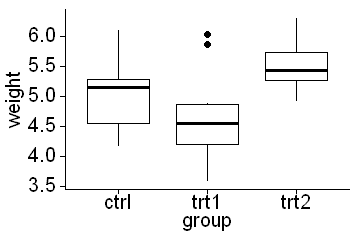

In [5]:
options(repr.plot.width=3, repr.plot.height=2)
ggboxplot(PlantGrowth, x = "group", y = "weight")

In [21]:
# head(PlantGrowth)
# mean(PlantGrowth$weight)

PlantGrowth %>%
  group_by(group) %>% summarise(mean=mean(weight), sd=sd(weight), ss = sum((weight-mean(weight))^2))

`summarise()` ungrouping output (override with `.groups` argument)


group,mean,sd,ss
ctrl,5.032,0.5830914,3.05996
trt1,4.661,0.7936757,5.66929
trt2,5.526,0.4425733,1.76284


In [68]:
## total sum-squared deviation: SS_total
ss_total_table <- PlantGrowth %>% summarise(ss = sum((weight-mean(weight))^2))
ss_total <- ss_total_table$ss

## sum of sum-squared deviations withing groups: SS_error
ss_error_table <- PlantGrowth %>% group_by(group) %>% summarise(ss = sum((weight-mean(weight))^2))
ss_error <- sum(ss_error_table$ss)

## sum of sum-squared deviations of each sample mean from the overall mean, 
## multiplied by the number of observation in each treatment: SS_treatments
total_mean <- mean(PlantGrowth$weight)
n <- stats_groups$n[1]
ss_treatments_table <- PlantGrowth %>% group_by(group) %>% summarise(ss = (mean(weight)-total_mean)^2)
ss_treatments <- sum(ss_treatments_table$ss)*n

## check SS_total = SS_error + SS_treatments
ss_error
ss_total
ss_total-ss_error
ss_treatments

## DF total = DF treatment + DF error
df_total <- length(PlantGrowth$weight)-1
df_treatments <- length(unique(PlantGrowth$group))-1
df_error <- length(PlantGrowth$weight) - length(unique(PlantGrowth$group))

#df_total
#df_treatments
#df_error

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


[1] 10.49209

[1] 14.25843

[1] 3.76634

[1] 3.76634

In [70]:
F <- (ss_treatments/df_treatments)/(ss_error/df_error)
F

[1] 4.846088

In [25]:
res.aov <- PlantGrowth %>% anova_test(weight ~ group)
res.aov

Coefficient covariances computed by hccm()


Effect,DFn,DFd,F,p,p<.05,ges
group,2,27,4.846,0.016,*,0.264


From the above ANOVA table, it can be seen that there are significant differences between groups (p = 0.016).

#### Example 4: two-way ANOVA (balanced, with interactions) <a class="anchor" id="two_way_anova"></a>

The two-way ANOVA is a statistical procedure used to assess whether the means of a quantitative variable within several pre-defined groups differ from each other. In the **two-way ANOVA, the groups are defined by the levels of two categorical variables A and B (*factors* or *treatments*)**, differently from one-way ANOVA, where the groups were defined by the levels of just one categorical variable.\
As in one-way ANOVA, it's assumed that all samples are drawn from **normally distributed populations with equal variances**, $N(\mu_{kj}, \sigma)$ . Also it's quite important to have exactly the **same number of samples n in each analysis group (balanced ANOVA)**.

The two-way ANOVA tests three null hypothesis at the same time: 
<l>
<li>There is no difference in population means at any level of the first independent categorical variable A. Alternative hypothesis: there is a statistically significant difference in the population means related to factor A.</li>
<li>There is no difference in population means at any level of the first independent categorical variable B. Alternative hypothesis: there is a statistically significant difference in the population means related to factor B.</li>
<li>There is no interaction between factors A and B. The effect of one independent variable A does not depend on the effect of the other independent variable B.</li>
</l> 

Steps for hypothesis testing:
<ol>
<li> We have $n_{groups}$ random samples each one with the <b>same number $n$ of elements (<i>balanced</i> ANOVA)</b>, where each group is identified by the levels of two categorical variables A and B ($n_{groups}=a*b$, where $a$ is the number of levels for variable A and $b$ is the number of levels for variable B). </li>
<li> Null hypotheses:
<ol>
<li>$H_{0}: \mu_{.1}=\mu_{.2}= ...=\mu_{.a}$</li>
<li>$H_{0}: \mu_{1.}=\mu_{2.}= ...=\mu_{b.}$</li>
<li>There is no interaction between factors A and B. $H_{0}: \mu_{jk}=\mu_{total}-(\mu_{k.}-\mu_{total})-(\mu_{.j}-\mu_{total})$ where j refers to factor A and k refers to factor B. The alternative hypothesis being $H_{1}: \mu_{jk}\neq\mu_{total}-(\mu_{j.}-\mu_{total})-(\mu_{.k}-\mu_{total})$ or written in another way $H_{1}: \mu_{jk} = \mu_{total}-(\mu_{j.}-\mu_{total})-(\mu_{.k}-\mu_{total})+(\alpha \beta)_{jk}$</li>
    The term $(\alpha \beta)_{jk}$ is called <i>interaction term</i> and the null hypothesis assume it equal to zero. 
</ol>    
    <li> From the observed samples data we calculate the <b>three F-test statistics</b>
    <ol>
<li>$F(A) =\frac{MS_{A}}{MS_{error}} =\frac{SS_{A}/DF_{A}}{SS_{error}/DF_{error}}$</li>
<li>$F(B) =\frac{MS_{B}}{MS_{error}} =\frac{SS_{B}/DF_{B}}{SS_{error}/DF_{error}} $</li>
<li>$F(AB) =\frac{MS_{AB}}{MS_{error}}  =\frac{SS_{AB}/DF_{AB}}{SS_{error}/DF_{error}}$</li>
</ol> 
$SS_{A}= nb\sum_{j}^{a}(\bar{x}_{j}-\bar{x}_{total})^2$ is based on the deviations from the grand mean of means of observations for each level of factor A, the result being multiplied by the number n of observations in each group multiplied by the number b of levels for factor B.<br>
$SS_{B}= na\sum_{k}^{b}(\bar{x}_{k}-\bar{x}_{total})^2$ is based on the deviations from the grand mean of means of observations for each level of factor B, the result being multiplied by the number n of observations in each group multiplied by the number a of levels for factor A.<br>
$SS_{error} =\sum_{k}^{b}\sum_{j}^{a}\sum_{i}^{n}(x_{ijk}- {{\bar{x}_{jk}}})^2 $ is based on all the observation deviations from their group mean, where each group is defined by factors A and B.<br> 
$SS_{total} =\sum_{k}^{b}\sum_{j}^{a}\sum_{i}^{n}(x_{ijk}- {{\bar{x}_{total}}})^2 $ is the total sum of squares based on all the observation deviations from the grand mean. <br>
$SS_{AB} = n\sum_{k}^{b}\sum_{j}^{a} (\bar{x}_{jk}-\bar{x}_{j}-\bar{x}_{k}-\bar{x}_{total})^{2}$ is the sum of squares for the interaction.<br>
The degrees of freedom follow the following formulas: $DF_{A} =a-1 $, $DF_{B}=b-1$, $DF_{AB}=(a-1)(b-1)$, $DF_{total}=n_{total}-1$, $DF_{error}= n_{total}-ab$.<br>     
The sum of squares follow the equation $SS_{total} = SS_{A}+SS_{B}+SS_{AB}+SS_{error}$ and the degrees of freedom $DF_{total}= DF_{A}+DF_{B}+DF_{AB}+DF_{error}$.<br>

For each one of the null hypothesis, the assumption implies that the corresponding statistic <b>F will follow a F-distribution</b>.
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  

<br />
The two-way ANOVA stands on these main assumptions:

- independence of observations.
- **normality of distributions** in each group.
- equality (or "homogeneity") of variances, called **homoscedasticity** — the variance of data in groups should be the same.
- same number of samples in each analysis group (*balanced* ANOVA).
- no significant outliers in any cell of the design.

https://www.itl.nist.gov/div898/handbook/prc/section4/prc437.htm \
https://www.scribbr.com/statistics/two-way-anova/

Check here for interaction term and explicit null hypothesis for it:\
https://learningstatisticswithr.com/book/anova2.html

Check here for balanced three-way ANOVA and unbalanced ANOVA:\
http://users.stat.umn.edu/~helwig/notes/aov2-Notes.pdf



**Numerical Example**

We use the built-in R data set named ToothGrowth. It contains data from a study evaluating the effect of vitamin C on tooth growth in Guinea pigs. The experiment has been performed on 60 pigs, where each animal received one of three dose levels of vitamin C (0.5, 1, and 2 mg/day) by one of two delivery methods, orange juice (OJ) or ascorbic acid (VC).

Here we assume that we have done all the necessary tests for checking normality and homoscedasticity conditions.

http://www.sthda.com/english/wiki/two-way-anova-test-in-r

Check for example of unbalanced two-way ANOVA:\
https://www.datanovia.com/en/lessons/anova-in-r/ 

In [2]:
library(tidyverse)
library(dplyr)
library(ggpubr)
library(rstatix)

In [3]:
set.seed(123)
my_data <- ToothGrowth

In [4]:
## ATT! It's important to have categorical variables for groups definitions!!!
my_data$supp <- as.factor(my_data$supp)
my_data$dose <- as.factor(my_data$dose)

In [5]:
# Check a random sample from the dataset
# my_data %>% sample_n_by(supp, dose, size = 1)

# mean and sd per group
sum_stats <- my_data %>%
  group_by(supp, dose) %>%
  get_summary_stats(len, type = "mean_sd")

In [6]:
sum_stats 

supp,dose,variable,n,mean,sd
OJ,0.5,len,10,13.23,4.460
OJ,1,len,10,22.70,3.911
OJ,2,len,10,26.06,2.655
VC,0.5,len,10,7.98,2.747
VC,1,len,10,16.77,2.515
VC,2,len,10,26.14,4.798


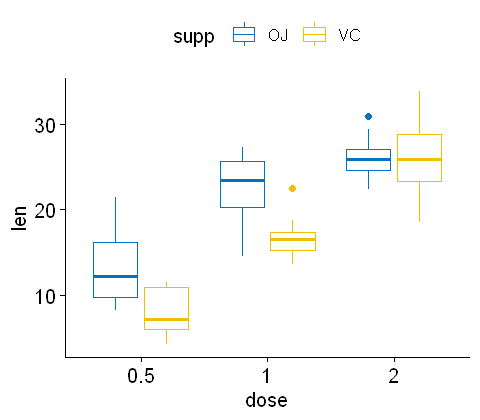

In [7]:
options(repr.plot.width=4, repr.plot.height=3.5)
bxp <- ggboxplot(
  my_data, x = "dose", y = "len",
  color = "supp", palette = "jco"
  )
bxp

In [8]:
## number of observations and groups
n <- sum_stats$n[1] # number of observation per group: same for every group in balanced anova
n_total <- length(my_data$len)
n_groups <- nrow(sum_stats)
n_dose <- length(unique(sum_stats$dose))
n_supp <- length(unique(sum_stats$supp))

## degrees of freedom
df_total <- n_total-1
df_dose <- n_dose-1
df_supp <- n_supp-1
df_error <- n_total-n_dose*n_supp
df_dose_supp <- (n_dose-1)*(n_supp-1)

## check degrees of freedom equivalence
df_dose+df_supp+df_error+df_dose_supp == df_total

[1] TRUE

In [9]:
total_mean <- mean(my_data$len)

## sum-squared deviations
ss_total_table <- my_data %>% summarise(ss = sum((len-total_mean)^2))
ss_total <- ss_total_table$ss

ss_dose_table <- my_data %>% group_by(dose) %>% summarise(ss = (mean(len)-total_mean)^2)
ss_dose <- sum(ss_dose_table$ss)*n*n_supp

ss_supp_table <- my_data %>% group_by(supp) %>% summarise(ss = (mean(len)-total_mean)^2)
ss_supp <- sum(ss_supp_table$ss)*n*n_dose

ss_error_table <- my_data %>% group_by(dose, supp) %>% summarise(ss = sum((len-mean(len))^2))
ss_error <- sum(ss_error_table$ss)

ss_dose_supp_table <- my_data %>%
  group_by(dose) %>% 
  mutate(mean_dose = mean(len)) %>% 
  ungroup() %>% 
  group_by(supp) %>% 
  mutate(mean_supp = mean(len)) %>% 
  ungroup()  %>%
  group_by(dose, supp) %>% 
  mutate(mean_dose_supp = mean(len)) %>% 
  ungroup()

ss_dose_supp <- sum((ss_dose_supp_table$mean_dose_supp-ss_dose_supp_table$mean_dose-ss_dose_supp_table$mean_supp+total_mean)^2)

## check equivalence
round(ss_dose+ss_supp+ss_error+ss_dose_supp,3) == round(ss_total,3)


`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` regrouping output by 'dose' (override with `.groups` argument)


[1] TRUE

In [22]:
## F values
F_dose <- (ss_dose/df_dose)/(ss_error/df_error)
F_supp <- (ss_supp/df_supp)/(ss_error/df_error)
F_dose_supp <- (ss_dose_supp/df_dose_supp)/(ss_error/df_error)
F_supp
F_dose
F_dose_supp

[1] 15.57198

[1] 91.99996

[1] 4.106991

In [10]:
### Two-way ANOVA with interaction effect. NOTE: aov is designed for BALANCED DESIGNS!!!
res.aov <- aov(len ~ supp + dose + supp:dose, data = my_data)
# res.aov <- aov(len ~ supp * dose , data = my_data) ## equivalent call
summary(res.aov)

## Note that, in the situation where the interaction is 
## not significant you should use the additive model.

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We can conclude:
<l>
<li>There is a statistically significant difference in the population means related to the delivery method (supp). This indicates that the levels of supp are associated with significant different tooth length.</li>
<li>There is a statistically significant difference in the population means related the dose level (dose). This indicates that the levels of dose are associated with significant different tooth length.</li>
<li>There is statistically significant interaction between the delivery method and the dose level.  This indicates that the relationships between dose and tooth length depends on the supp method.</li>
</l> 


### Tests of frequencies of categorical data <a class="anchor" id="tests_categorical_data"></a>

The **analysis of categorical data is analysis of frequencies**. Here we consider the most common hypothesis testing techniques for **comparing frequencies across groups**, i.e. how the observations are distributed across groups.

When two or more groups are compared, the data are often shown in the form of a **frequency table, also called contingency table**. The contingency table shows in every cell the observed frequency for a group, i.e. the total number of observations belonging to that group. Each group is defined by the levels of a certain number of categories (*factors*), that define the dimensionality of the contingency table. The contingency table also contains totals for each factor.

As an example, if we consider groups defined by **two factors each one with two levels**, the **contingency table has the following 2x2 structure**:

<table>
  <caption>2x2 contingency table:</caption>
  <tr>
    <td></td>
    <th scope="col">B = 0</th>
    <th scope="col">B = 1</th>
    <th scope="col">Total</th>
  </tr>
  <tr>
    <th scope="row">A = 0</th>
    <td>a</td>
    <td>b</td>
    <td>a+b</td>
  </tr>
  <tr>
    <th scope="row">A = 1</th>
    <td>c</td>
    <td>d</td>
    <td>c+d</td>
  </tr>
    <tr>
    <th scope="row">Total</th>
    <td>a+c</td>
    <td>b+d</td>
    <td>a+b+c+d</td>
  </tr>
</table>

where A and B are the two factors, each one having levels 0 and 1.

Here we consider tests for **one-way contingency tables**, i.e. cases in which we have just **one categorical variable** (groups defined by the levels of one categorical variable) and tests for **two-way contingency tables**, i.e. cases in which we have **two categorical variables** (groups defined by the levels of two categorical variables). For tests analysing **three-way or more contingency tables** check the *cran.r-project* document.

Many of the tests considered here, are based on **analyzing the deviation of the observed frequencies from their expected value**.


Book: An Introduction to Statistics with Python \
wiki - Chi-squared test \
wiki - Pearson's chi-squared test \
https://cran.r-project.org/web/packages/vcdExtra/vignettes/vcd-tutorial.pdf \
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-chisquare/bs704_hypothesistesting-chisquare_print.html

#### Example 1: One-way Pearson Chi-Square test - goodness of fit <a class="anchor" id="one_way_chi2"></a>

The one-way Chi-Square test is a statistical procedure used to compare **frequencies of observations across groups** in the case groups are defined by just **one categorical variable or factor**. The **goal here is to assess if a sample of observations could have been take from a population with a specific probability distribution $p_{i}$ across groups**.

The null hypothesis assumes that the population has a specific probability distribution, with probability $p_{i}$ that an observation falls into the $i_{th}$ group, i.e. $H_{0}: p_{1}=p_{01}, p_{2}=p_{02}, \dots, p_{k}=p_{0k}$, where $k$ is the number of **groups, defined by the levels of one categorical variable**. The alternative hypothesis corresponds in a statistically significant difference of the population distribution across groups in comparison to the one assumed by the null hypothesis.

<ol>
<li> We have $n$ observations in a random sample from a population, classified into k mutually exclusive classes with respective observed numbers $x_{i}$ (for i = 1,2,…,k).</li>
<li> The null hypothesis $H_{0}: p_{1}=p_{01}, p_{2}=p_{02}, \dots, p_{k}=p_{0k}$, gives the probability $p_{i}$ that an observation falls into the ith class. Under this assumption, the expected frequencies are determined by allocating the observations to the groups according to the distribution specified in $H_{0}$. This is done by multiplying the observed sample size $n$ by the probabilities specified in the null hypothesis ($p_{01}, p_{02}, \dots, p_{0k}$). </li>
<li> From the observed sample data we calculate the test-statistic <br> 
    $V = \sum \frac{(O-E)^2}{E}$ <br> 
    where O = <i>observed frequency</i> and E = <i>expected frequency</i>
    in each of the response categories (groups). <br>
    If we assume the null hypothesis, the <b>$V$ test statistic can be approximated (under the assumptions stated below) by a $\chi^2$ distribution with k − 1 degrees of freedom </b>.   
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  


For assumptions check Two-way Pearson Chi-Square test - test of independence below. (Pearson's chi-squared test - wiki)


**Numerical Example**

A University conducted a survey of its recent graduates. In response to a question on regular exercise, 60% of all graduates reported getting no regular exercise, 25% reported exercising sporadically and 15% reported exercising regularly as undergraduates. The next year the University launched a health promotion campaign on campus in an attempt to increase health behaviors among undergraduates. To evaluate the impact of the program, the University again surveyed graduates and asked the same questions. The survey was completed by 470 graduates and the following data were collected on the exercise question:

<table>
  <tr>
    <td></td>
    <th scope="col">No exercise</th>
    <th scope="col">Sporadic Exarcise</th>
    <th scope="col">Regular Exercise</th>
    <th scope="col">Total</th>
  </tr>
  <tr>
    <th scope="row">Number of students</th>
    <td>255</td>
    <td>125</td>
    <td>90</td>
    <td>470</td>
  </tr>
</table>

Based on the data, we want to know: is there evidence of a shift in the distribution of responses to the exercise question following the implementation of the health promotion campaign on campus?

$H0: p_{1}=0.60, p_{2}=0.25, p_{3}=0.15$

We assume that all assumption for using $\chi^2$ test have been checked.

 https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-chisquare/bs704_hypothesistesting-chisquare_print.html

In [40]:
# calculate Chi2
O <- c(255, 125, 90)
n <- sum(O)

p <- c(0.60, 0.25, 0.15)
E <- p*n

chi2 <- sum((O-E)^2/E)

In [12]:
chi2

[1] 8.457447

In [13]:
chisq.test(O, p=p, correct=FALSE)


	Chi-squared test for given probabilities

data:  O
X-squared = 8.4574, df = 2, p-value = 0.01457


Here, we reject $H_{0}$ and concluded that the distribution of responses to the exercise question following the implementation of the health promotion campaign was not the same as the distribution prior.

#### Example 2: Two-way Pearson Chi-Square test - test of independence <a class="anchor" id="two_way_chi2_independence"></a>

We now consider the situation where groups are defined by **two categorical variables or factors A and B**. Here the Chi-Square test of independence is used to **determine if there is a significant relationship between two nominal (categorical) variables**. The frequency of each level for one nominal variable is compared across the levels of the second nominal variable. 

The null hypothesis states that knowing the level of variable A does not help you predict the level of variable B. That is, the variables are independent. The alternative hypothesis is that knowing the level of variable A can help you predict the level of variable B.

<ol>
<li> We have $n$ observations in a random sample from a population, classified into $n_{groups}$, where each group is identified by the levels of two categorical variables A and B ($n_{groups}=a*b$, where $a$ is the number of levels for variable A and $b$ is the number of levels for variable B), with respective observed numbers $x_{jk}$. </li>
<li> Null hypothesis: variable A and B are independent. <br>
 $P(A\&B)=P(A)P(B)$ <br>
So the the null hypothesis can be written in a tabular form 
<table>
  <caption>Null hypothesis:</caption>
  <tr>
    <td></td>
    <th scope="col">B = 1 </th>
    <th scope="col">B = 2 </th>
    <th scope="col"> ... </th>
    <th scope="col">B = b </th> 
  </tr>
  <tr>
    <th scope="row">A = 1</th>
    <td>$p_{11}$=$p_{1.}$$p_{.1}$</td>
    <td>$p_{12}$=$p_{1.}$$p_{.2}$</td>
    <td>...</td>
    <td>$p_{1b}$=$p_{1.}$$p_{.b}$</td>
  </tr>
  <tr>
    <th scope="row">A = 2</th>
    <td>$p_{21}$=$p_{2.}$$p_{.1}$</td>
    <td>$p_{22}$=$p_{2.}$$p_{.2}$</td>
    <td>...</td>
    <td>$p_{2b}$=$p_{2.}$$p_{.b}$</td>
  </tr>
     <tr>
    <th scope="row"> ... </th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
      <tr>
    <th scope="row">A = a</th>
    <td>$p_{a1}$=$p_{a.}$$p_{.1}$</td>
    <td>$p_{a2}$=$p_{a.}$$p_{.2}$</td>
    <td>...</td>
    <td>$p_{ab}$=$p_{a.}$$p_{.b}$</td>
  </tr>
</table>    
        
where 𝑝jk gives the probability that an observation falls into the jkth group (level j of variable A and level k of variable B).
Given the observed contingency table, of frequencies in each group 
<table>
  <caption>Null hypothesis:</caption>
  <tr>
    <td></td>
    <th scope="col">B = 1 </th>
    <th scope="col">B = 2 </th>
    <th scope="col"> ... </th>
    <th scope="col">Total</th> 
  </tr>
  <tr>
    <th scope="row">A = 1</th>
    <td>$x_{11}$</td>
    <td>$x_{12}$</td>
    <td>...</td>
    <td>$\sum$ $x_{1k}$</td>
  </tr>
  <tr>
    <th scope="row">A = 2</th>
    <td>$x_{21}$</td>
    <td>$x_{22}$</td>
    <td>...</td>
    <td>$\sum$ $x_{2k}$</td>
  </tr>
     <tr>
    <th scope="row"> ... </th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
      <tr>
    <th scope="row">Total</th>
    <td>$\sum$ $x_{j1}$</td>
    <td>$\sum$ $x_{j2}$</td>
    <td>...</td>
    <td>$n =$$\sum$ $x_{jk}$</td>
  </tr>
</table>     
    
we can estimate such probabilities. Our best estimate is given by: <br>
    
$p_{jk} = p_{j.}p_{.k} \approx \frac{\sum^a_{i} x_{ji}}{n}\frac{\sum^b_{i} x_{ik}}{n}$ 
    
The expected frequency is found by multiplying $E_{jk} =n p_{jk}$.
<li> From the observed sample data we calculate the test-statistic: <br> 
    $V = \sum \frac{(O-E)^2}{E}$ <br> 
    where O = <i>observed frequency</i> and E = <i>expected frequency</i>
    in each of the response categories (groups). <br>
    If we assume the null hypothesis, the <b> $V$ test statistic  can be approximated (under the assumptions stated below) by a $\chi^2$ distribution with $df = (a-1)(b-1)$ degrees of freedom </b>.   
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  

Assumptions:
- **Simple random sample**: The sample data is a random sampling from a fixed distribution or population where every collection of members of the population of the given sample size has an equal probability of selection.
- **Sample size (whole table)**: A sample with a sufficiently large size is assumed. If a chi squared test is conducted on a sample with a smaller size, then the chi squared test will yield an inaccurate inference.
- **Expected cell count**: Adequate expected cell counts. Some require 5 or more, and others require 10 or more. A common rule is 5 or more in all cells of a 2-by-2 table, and 5 or more in 80% of cells in larger tables, but no cells with zero expected count.  When this assumption is not met, Yates's correction is applied.
- **Independence**: The observations are always assumed to be independent of each other. This means chi-squared cannot be used to test correlated data (like matched pairs or panel data). In those cases, McNemar's test may be more appropriate.


https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-chisquare/bs704_hypothesistesting-chisquare_print.html \
https://www.statisticssolutions.com/non-parametric-analysis-chi-square/ \
https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-association-independence \
Chi-squared test - wiki \
Pearson's chi-squared test - wiki

**Numerical Example**

We have data from a survey of university graduates which assessed, among other things, how frequently they exercised and their living arrangements. The survey was completed by 470 graduates.
We wish to assess whether there is a relationship between exercise on campus and students' living arrangements.
Based on the data, is there a relationship between exercise and student's living arrangement? Do you think where a person lives affect their exercise status?

<table>
  <caption>Contingency table:</caption>
  <tr>
    <td></td>
    <th scope="col">No Exercise</th>
    <th scope="col">Sporadic Exercise</th>
    <th scope="col">Regular Exercise</th>  
    <th scope="col">Total</th>
  </tr>
  <tr>
    <th scope="row">Dormitory</th>
    <td>32</td>
    <td>30</td>
        <td>28</td>
    <td>90</td>
  </tr>
  <tr>
    <th scope="row">On-Campus Apartment</th>
    <td>74</td>
    <td>64</td>
     <td>42</td>
    <td>180</td>
  </tr>
      <tr>
    <th scope="row">Off-Campus Apartment</th>
    <td>110</td>
    <td>25</td>
     <td>15</td>
    <td>150</td>
  </tr>
      <tr>
    <th scope="row">At Home</th>
    <td>39</td>
    <td>6</td>
     <td>5</td>
    <td>50</td>
  </tr>
    <tr>
    <th scope="row">Total</th>
    <td>255</td>
    <td>125</td>
    <td>90</td>
    <td>470</td>
  </tr>
</table>


https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-chisquare/bs704_hypothesistesting-chisquare_print.html

In [37]:
# calculate Chi2
matrix <- cbind(c(32,74,110,39),c(30,64,25,6),c(28,42,15,5)) 
colnames(matrix) <- c("no_exercise","sporadic_exercise","regular_exercise")
rownames(matrix) <- c("dormitory","on_campus_apartment","off_campus_apartment", "home")
O <- data.frame(matrix)

n <- sum(O)
exercise_p <- colSums(O)/n
living_p <- rowSums(O)/n
matrix_expected <- cbind(living_p*exercise_p["no_exercise"],living_p*exercise_p["sporadic_exercise"],
                         living_p*exercise_p["regular_exercise"])
colnames(matrix_expected) <- c("no_exercise","sporadic_exercise","regular_exercise")
E <- matrix_expected*n

Chi2 <- sum((O-E)^2/E)

In [38]:
Chi2

[1] 60.43945

In [39]:
chisq.test(O, correct=FALSE)


	Pearson's Chi-squared test

data:  O
X-squared = 60.439, df = 6, p-value = 3.664e-11


Here, we reject  𝐻0  and concluded that there is significant relationship between exercise on campus and students' living arrangements.

#### Example 2: Two-way Pearson Chi-Square test - test for homogeneity <a class="anchor" id="two_way_chi2_homogeneity"></a>

In the Chi-square test for homogeneity the Chi-square test is not used, as for the two-way Chi-Suare test of independence, to determine if there is a relationship between two categorical variables that describe a random sample taken from a population.
Here, in the **Chi-Square test of homogeneity, we are going to look at two different groups and see if the distributions of those groups for a certain categorical variable are similar or not**.

**Here we sample from two different populations.**

Our null hypothesis is that there is **no difference in the distribution of the two populations in terms of the categorical variable we are considering**. The alternative hypothesis is that there is a difference.

<ol>
<li> We have $n_{1}$ observations of one categorical variable A in a random sample from a population 1 (group 1) and $n_{2}$ observations of the same categorical variable A in a random sample from a population 2 (group 2), where $x_{jk}$ are the respective observed frequencies. In this case k takes only two possible values k=0,1. </li>
<li> Null hypothesis: the distribution of variable A is the same for the two populations 1 and 2. <br>
Under this assumption we can calculate the expected values of the frequencies for each level of category A in the two groups.   
    
Given the observed contingency table of frequencies in each group: 
<table>
  <caption>Null hypothesis:</caption>
  <tr>
    <td></td>
    <th scope="col"> group = 1 </th>
    <th scope="col"> group = 2 </th>
    <th scope="col">Total</th> 
  </tr>
  <tr>
    <th scope="row">A = 1</th>
    <td>$x_{11}$</td>
    <td>$x_{12}$</td>
    <td>$\sum$ $x_{1k}$</td>
  </tr>
  <tr>
    <th scope="row">A = 2</th>
    <td>$x_{21}$</td>
    <td>$x_{22}$</td>
    <td>$\sum$ $x_{2k}$</td>
  </tr>
     <tr>
    <th scope="row"> ... </th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
      <tr>
    <th scope="row">Total</th>
    <td>$\sum$ $x_{j1}$</td>
    <td>$\sum$ $x_{j2}$</td>
    <td>$n =$$\sum$ $x_{jk}$</td>
  </tr>
</table> 
    
our best guess for the probability of obtaining A = j is independent of the group and equal to:

$p_{j.} = \frac{\sum^1_{0} x_{jk}}{n} =\frac{x_{j1}+x_{j2}}{n}$
 
So the expected frequency $E_{jk}$ is found by simply multiplying this probability by the total number of observations in group k:
    
$E_{jk} = p_{j.} \sum^{a}_{i} x_{ik} = (\sum^1_{0} x_{jk} \sum^{a}_{i} x_{ik})/n$
    
<b>Even if the Chi-Square test of homogeneity is trying to answer a different question if compared to the Chi-Squared test of independence, we observe that the $E_{jk}$ that we obtain is exactly the same, so the two problems can be described in the same way. </b>
   
<li>The following steps are exactly the same as the ones presented in the Chi-Square for independence.  </li>
</ol>  

**Numerical Example**

Let's consider left-handed people vs right handed people. We are wondering: do they have the same preference for subject domains? \
Our null hypothesis is that the is no difference in the distribution of right-handed and left-handed people in terms of their preferences for subject domains. The alternative hypothesis is that there is a difference.

From the right-handed population we exctract a random sample of $n_{r}=60$ right-handed people and from the left-handed population we extract a random sample of $n_{l}=40$ left-handed people.

Here is the data collected about the favorite subject of the people from the two samples:

<table>
  <caption>Contingency table:</caption>
  <tr>
    <td></td>
    <th scope="col">Right</th>
    <th scope="col">Left</th>
    <th scope="col">Total</th>
  </tr>
  <tr>
    <th scope="row">STEM</th>
    <td>30</td>
    <td>10</td>
    <td>40</td>
  </tr>
  <tr>
    <th scope="row">Humanities</th>
    <td>15</td>
    <td>25</td>
    <td>40</td>
  </tr>
      <tr>
    <th scope="row">Equal</th>
    <td>15</td>
    <td>5</td>
     <td>20</td>
  </tr>
    <tr>
    <th scope="row">Total</th>
    <td>60</td>
    <td>40</td>
    <td>100</td>
  </tr>
</table>


https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-homogeneity

In [66]:
# calculate Chi2
matrix <- cbind(c(30, 15, 15),c(10, 25, 5)) 
colnames(matrix) <- c("right", "left")
rownames(matrix) <- c("STEM", "humanities", "equal")
O <- data.frame(matrix)

n_right <- colSums(O)["right"]
n_left <- colSums(O)["left"]

subjects_right_p <- rowSums(O)/100*n_right
subjects_left_p <- rowSums(O)/100*n_left

matrix_expected <- cbind(subjects_right_p, subjects_left_p)
colnames(matrix_expected) <- c("right", "left")

E <- data.frame(matrix_expected)

Chi2 <- sum((O-E)^2/E)

In [67]:
Chi2

[1] 14.0625

In [68]:
chisq.test(O, correct=FALSE)


	Pearson's Chi-squared test

data:  O
X-squared = 14.062, df = 2, p-value = 0.0008838


Here, we reject  𝐻0  and concluded that there is a difference in the distribution of right-handed and left-handed people in terms of their preferences for subject domains.

In [73]:
# Calculate power of the test
c <- min(c(dim(O)[1],dim(O)[2]))
sig_level <- 0.05
n <- sum(O)
df <- (dim(O)[1]-1)*(dim(O)[2]-1)

## effect size (Cramer's)
w <- sqrt(Chi2/(n*(c-1)))

## Check here for more details about Cramer's effect size:
## https://www.datascienceblog.net/post/statistical_test/effect_size/

In [74]:
library(lsr)
w1 <- cramersV(O, correct=FALSE)
w1
w

[1] 0.375

[1] 0.375

In [75]:
library(DescTools)
power.chisq.test(w = w, df = df, sig.level = sig_level, power = NULL, n = n)


     Chi squared power calculation 

              w = 0.375
              n = 100
             df = 2
      sig.level = 0.05
          power = 0.9291329

NOTE: n is the number of observations


There is a 93% chance of correctly rejecting the null hypothesis, assuming that the magnitude of the effect observed is true (difference between the two groups).

In [72]:
power.chisq.test(w = w, df = df, sig.level = sig_level, power = 0.8, n = NULL)


     Chi squared power calculation 

              w = 0.375
              n = 68.51334
             df = 2
      sig.level = 0.05
          power = 0.8

NOTE: n is the number of observations


We would have needed only 68 total observations to correctly reject the null hypothesis with a 80% probability (assuming the effect size we observe as true).

In [61]:
# cramer.v <- function(contingency.tab) {
#     chi <-  chisq.test(contingency.tab, correct = FALSE)$statistic
#     n <- sum(contingency.tab)
#     c <- min(nrow(contingency.tab), ncol(contingency.tab))
#     V <- sqrt(chi / (n * (c-1)))
#     return(as.numeric(V))
# }

## https://www.datascienceblog.net/post/statistical_test/effect_size/

### Statistical modeling for hypothesis testing <a class="anchor" id="statistical_modeling_for_hypothesis_testing"></a>

Most problems that we considered above can be viewed from two perspectives: one is making a statistical hypothesis and verify or falsify that hypothesis (as in the examples above), the other one is **make a statistical model and analyze the significance of the model parameters**. This second perspective is the subject of this section. 

Book: An Introduction to Statistics with Python (p.144, p.207)\
http://psych.colorado.edu/~carey/Courses/PSYC5741/handouts/GLM%20Theory.pdf

#### Example 1: Linear Regression for Two-sample Student's t-test <a class="anchor" id="linear_regression_t_test"></a>

In the **two sample Student's t-test** we want **compare two groups of observations**. The goal is to determine if both groups could have been generated by the **same process with the same mean**. It assumes populations with normal distribution $N(\mu_{1}, \sigma_{1})$ and $N(\mu_{2}, \sigma_{2})$.

Here, instead of calculating directly the t-statistic from the observed data, we perform a **linear regression**, where the independent variable represents the groups and the dependent variable represents the numerical variable we are trying to analize.
If we write the regression line (i.e. the best fit) as\
$\hat{y_i} = \hat{y}(x_i) = \theta_1 + x_i \theta_2$ \
then the $y_i$ values can be written as\
$y_i = \theta_1 + x_i \theta_2 + \epsilon_i$ \
where the error $\epsilon_i$ represents the part of y not explained by the linear model (residuals)\
$\epsilon_i = y_i - \hat{y_i}$\
Here the **independent variable $x_{i}$ takes only two values (*dummy variable*), for example $x_i=0,1$ that identify group 1 and group 2**, and the dependent variable $y_i$ represents the numerical variable. 

We can calculate explicitely the value of $\theta_1$ and $\theta_2$ in this specific case where we have just two $x_i$ values. We want to minimize the residuals sum of squares $\sum_{i}^{n}\epsilon_i^2$, i.e. $\frac{\partial \sum_{i}^{n}\epsilon_i^2}{\partial \theta_1}=0$ and $\frac{\partial \sum_{i}^{n}\epsilon_i^2}{\partial \theta_2}=0$.\
$\frac{\partial}{\partial \theta_1}\sum_{i}^{n}(y_i-\theta_1 - x_i \theta_2)^2=\frac{\partial}{\partial \theta_1}(\sum_{j}^{n_1}(y_j-\theta_1 - x_1 \theta_2)^2+\sum_{k}^{n_2}(y_k-\theta_1 - x_2 \theta_2)^2)=-2\sum_{j}^{n_1}(y_j-\theta_1 - x_1 \theta_2)-2\sum_{k}^{n_2}(y_k-\theta_1 - x_2 \theta_2)=-2(\sum_{j}^{n_1}y_j-n_1\theta_1 - n_1 x_1 \theta_2+\sum_{k}^{n_2}y_k-n_2\theta_1 - n_2 x_2 \theta_2)=-2(n_1\bar{y_1}+n_2\bar{y_2}-\theta_1(n_1+n_2)-\theta_2(n_1x_1+n_2x_2))=0$\
$\frac{\partial}{\partial \theta_2}\sum_{i}^{n}(y_i-\theta_1 - x_i \theta_2)^2=\frac{\partial}{\partial \theta_2}(\sum_{j}^{n_1}(y_j-\theta_1 - x_1 \theta_2)^2+\sum_{k}^{n_2}(y_k-\theta_1 - x_2 \theta_2)^2)=-2x_1\sum_{j}^{n_1}(y_j-\theta_1 - x_1 \theta_2)-2x_2\sum_{k}^{n_2}(y_k-\theta_1 - x_2 \theta_2)=-2(x_1\sum_{j}^{n_1}y_j-n_1x_1\theta_1 - n_1 x_1^2 \theta_2+x_2\sum_{k}^{n_2}y_k-n_2x_2\theta_1 - n_2 x_2^2 \theta_2)=-2(n_1x_1\bar{y_1}+n_2x_2\bar{y_2}-\theta_1(n_1x_1+n_2x_2)-\theta_2(n_1x_1^2+n_2x_2^2))=0$

For $x_1=0$ and $x_2=1$, we get\
$n_1\bar{y_1}+n_2\bar{y_2}-\theta_1(n_1+n_2)-n_2\theta_2=0$ \
$\bar{y_2}-\theta_1-\theta_2=0$\
which gives\
$\theta_1 =\bar{y_1} = \frac{\sum_{j}^{n_1}y_j}{n_1}$ \
$\theta_2 =\bar{y_2}-\bar{y_1} = \frac{\sum_{k}^{n_2}y_k}{n_2}-\frac{\sum_{j}^{n_1}y_j}{n_1}$

So, for $x$ taking only two values $x_i=0,1$, we have that <b> $\theta_1$ corresponds to the mean of  group 1 </b>, and <b>$\theta_2$ corresponds to the difference between the mean of the group 2 and the mean of the group 1</b> (ref 1, 2 and 3). 

Therefore we can write the **t-statistics** as\
$t = \frac{\bar{y}_{2}-\bar{y}_{1}}{s_{\bar{\Delta}}} = \frac{\theta_2}{s_{\bar{\Delta}}}$ \
where $s_{\bar{\Delta}}^{2}=\frac{s^{2}_{1}}{n1}+\frac{s^{2}_{2}}{n2}$, $s^{2}_{1}=\frac{\sum_{j}^{n1}(y_{j}- {{\bar{y}_{1}}})^2}{n1-1}$ and $s^{2}_{2}=\frac{\sum_{k}^{n_2}(y_{k}- {{\bar{y}_{2}}})^2}{n2-1}$ are the variances of groups 1 and 2.

In this context, the ASSUMPTION OF NORMALITY translates in assuming that the $\epsilon_i \sim N(0,\sigma_{\epsilon}^{2})$.

CHECK IT!!! The alternative hypothesis assumes that some difference exists between the two mean values $\mu_{1} \neq \mu_{2}$, whereas the null hypothesis assumes that no difference exists $\mu_{1}=\mu_{2}$.

<ol>
<li> We have two random samples: $n_{1}$ elements $y_{j}$ taken from group 1 and $n_{2}$ elements $y_{k}$ taken from group 2. </li>
<li> Null hypothesis $H_{0}: \mu_{1}=\mu_{2}$.</li>
<li> From the observed sample data we perform a linear regression and we calculate the <b> test-statistic
    $t = \frac{\theta_2}{s_{\bar{\Delta}}}$ </b>. If we assume the null hypothesis, i.e. the two samples are randomly taken from normal distributions with the same mean, then the statistic <b>t can be approximated as an ordinary Student's t-distribution with the degrees of freedom calculated using: check Welch's t-test</b>.   
</li>
<li> <b>Comparing the observed value of the statistics with the corresponding distribution</b>, we can find the likelihood that a value as extreme as or more than the observed one is found by chance. This is the <b>p-value</b>.</li>
<li> If <b>p < 0.05</b> (or below a threshold we decide), we <b>reject the null hypothesis</b> and speak of a statistically significant difference. </li>
</ol>  

<br />
The two samples t-test has these main assumptions:

- normally distributed
- independent groups

1 - C.Sala Notes \
2 - https://stats.stackexchange.com/questions/59047/how-are-regression-the-t-test-and-the-anova-all-versions-of-the-general-linear \
3 - Book: An Introduction to Statistics with Python (p.202, p.207)
4 - http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf

#### Example X: Generalised Linear Model for Hypothesis Testing: TODO <a class="anchor" id="glm_t_test"></a>

**Numerical Example**

We’re going to model Poisson Regression related to how frequently yarn breaks during weaving. The data set looks at how many warp breaks occurred for different types of looms, per fixed length of yarn.

**TODO: not clear interpretation of the three models**

https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/

In [100]:
library(datasets)
data <- warpbreaks

In [103]:
head(data,3)
summary(data)

breaks,wool,tension
26,A,L
30,A,L
54,A,L


     breaks      wool   tension
 Min.   :10.00   A:27   L:18   
 1st Qu.:18.25   B:27   M:18   
 Median :26.00          H:18   
 Mean   :28.15                 
 3rd Qu.:34.00                 
 Max.   :70.00                 

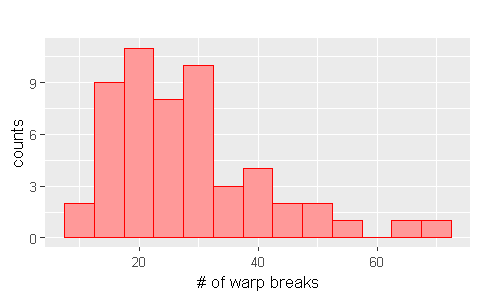

In [117]:
options(repr.plot.width=4, repr.plot.height=2.5)

pp1 <- ggplot(data,aes(x=breaks))+geom_histogram(col="red",fill="#ff9999", binwidth=5)+
theme(axis.text=element_text(size=8),axis.title=element_text(size=10))+ ylab("counts")+xlab("# of warp breaks")+
ggtitle("")
pp1

In [120]:
## Check if it's poissonian distribution: variance is equal to the mean
mean(data$breaks)
var(data$breaks)
# The variance is much greater than the mean, which suggests that we will have over-dispersion in the model.

[1] 28.14815

[1] 174.2041

In [177]:
## Let's try to fit with poissonian glm
poisson.model <- glm(breaks ~ wool + tension, data, family = poisson(link = "log"))
summary(poisson.model)


Call:
glm(formula = breaks ~ wool + tension, family = poisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6871  -1.6503  -0.4269   1.1902   4.2616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.69196    0.04541  81.302  < 2e-16 ***
woolB       -0.20599    0.05157  -3.994 6.49e-05 ***
tensionM    -0.32132    0.06027  -5.332 9.73e-08 ***
tensionH    -0.51849    0.06396  -8.107 5.21e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: 493.06

Number of Fisher Scoring iterations: 4


The general rule is that if there are k categories in a factor variable, the output of glm() will have k−1 categories with remaining 1 as the base category.
In our case $A$ has been made the base and is not shown in summary. Similarly, for tension $L$ has been made the base category.

If the Residual Deviance is greater than the degrees of freedom, then over-dispersion exists. This means that the estimates are correct, but the standard errors (standard deviation) are wrong and unaccounted for by the model.

https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/

In [131]:
## Let's try to fit with quasi-poisson model
poisson.model2 <- glm(breaks ~ wool + tension, data = data, family = quasipoisson(link = "log"))
summary(poisson.model2)


Call:
glm(formula = breaks ~ wool + tension, family = quasipoisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6871  -1.6503  -0.4269   1.1902   4.2616  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.69196    0.09374  39.384  < 2e-16 ***
woolB       -0.20599    0.10646  -1.935 0.058673 .  
tensionM    -0.32132    0.12441  -2.583 0.012775 *  
tensionH    -0.51849    0.13203  -3.927 0.000264 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 4.261537)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


In [166]:
## Let's try to fit with negative binomial model
library(MASS)
nb.model <- glm.nb(breaks ~ wool + tension, data = data)
summary(nb.model)


Call:
glm.nb(formula = breaks ~ wool + tension, data = data, init.theta = 9.944385436, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0144  -0.9319  -0.2240   0.5828   1.8220  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.6734     0.0979  37.520  < 2e-16 ***
woolB        -0.1862     0.1010  -1.844   0.0651 .  
tensionM     -0.2992     0.1217  -2.458   0.0140 *  
tensionH     -0.5114     0.1237  -4.133 3.58e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(9.9444) family taken to be 1)

    Null deviance: 75.464  on 53  degrees of freedom
Residual deviance: 53.723  on 50  degrees of freedom
AIC: 408.76

Number of Fisher Scoring iterations: 1


              Theta:  9.94 
          Std. Err.:  2.56 

 2 x log-likelihood:  -398.764 

**Let's calculate the power of test.**

The numerator degrees of freedom, u, is the number of coefficients you'll have in your model (minus the intercept). The denominator degrees of freedom, v, is the number of error degrees of freedom: v = n - u - 1. This implies n = v + u + 1. \
f2, is $\frac{R^{2}}{1 - R^{2}}$, where $R^{2}$ is the coefficient of determination.

https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html

In [172]:
library(rsq)
model = nb.model

R2 <- rsq(model) # https://rdrr.io/cran/rsq/man/rsq.html
f2 <- R2/(1-R2)

n <- dim(data)[1]
u <- length(nb.model$coefficients)-1
v <- n-u-1
sig_level <- 0.05

In [173]:
library(pwr)
pwr.f2.test(u = u, f2 = f2, sig.level = sig_level, v = v)


     Multiple regression power calculation 

              u = 3
              v = 50
             f2 = 0.4038135
      sig.level = 0.05
          power = 0.9759659


In [158]:
n

[1] 54

There is a 98% chance of correctly rejecting the null hypothesis, assuming that the magnitude of the effect observed is true.

In [159]:
pwr.f2.test(u = u, f2 = f2, sig.level = sig_level, power=0.8)


     Multiple regression power calculation 

              u = 3
              v = 27.15989
             f2 = 0.4043764
      sig.level = 0.05
          power = 0.8


We would have needed only $n = v+u+1 = 31$ total observations to correctly reject the null hypothesis with a 80% probability (assuming the effect size we observe is true).

#### Example XX: Linear Regression for One-way ANOVA (balanced): TODO <a class="anchor" id="linear_regression_anova"></a>

Example 5 groups with n number of elements each one

If we write the regression line (i.e. the best fit) as\
$\hat{y_i} = \hat{y}(x_i) = \theta_1 + x_i \theta_2$ \
then the $y_i$ values can be written as\
$y_i = \theta_1 + x_i \theta_2 + \epsilon_i$ \
Here the **independent variable $x_{i}$ takes five values (*dummy variable*), for example $x_i=0,1,2,3,4$ that identify group 1 to 5**, and the dependent variable $y_i$ represents the numerical variable. 

We can calculate explicitely the value of $\theta_1$ and $\theta_2$ in this specific case where we have five $x_i$ values. We want to minimize the residuals sum of squares $\sum_{i}^{n}\epsilon_i^2$, i.e. $\frac{\partial \sum_{i}^{n}\epsilon_i^2}{\partial \theta_1}=0$ and $\frac{\partial \sum_{i}^{n}\epsilon_i^2}{\partial \theta_2}=0$.

$\frac{\partial}{\partial \theta_1}\sum_{i}^{n_{tot}}(y_i-\theta_1 - x_i \theta_2)^2=\frac{\partial}{\partial \theta_1}(\sum_{i}^{n}(y_i-\theta_1 - x_1 \theta_2)^2+\sum_{j}^{n}(y_j-\theta_1 - x_2 \theta_2)^2+ ...+\sum_{k}^{n}(y_k-\theta_1 - x_5 \theta_2)^2)= -2n(\bar{y}_1-\theta_1-x_1 \theta_2)-\dots - 2n(\bar{y}_5-\theta_1-x_5 \theta_2)= -2n(\bar{y}_1+\dots+\bar{y}_5-5\theta_1 - \theta_2(x_1 + \dots + x_5))=0$\
$\frac{\partial}{\partial \theta_2}\sum_{i}^{n}(y_i-\theta_1 - x_i \theta_2)^2= \frac{\partial}{\partial \theta_2}(\sum_{i}^{n}(y_i-\theta_1 - x_1 \theta_2)^2+\sum_{j}^{n}(y_j-\theta_1 - x_2 \theta_2)^2+ ...+\sum_{k}^{n}(y_k-\theta_1 - x_5 \theta_2)^2)=-2nx_1(\bar{y}_1-\theta_1-x_1 \theta_2)-\dots - 2nx_5(\bar{y}_5-\theta_1-x_5 \theta_2)=
-2n(x_1\bar{y}_1+ \dots +x_5 \bar{y}_5 - \theta_1(x_1 + \dots + x_5)-\theta_2 (x_1^2+ \dots + x_5^2))=
0$

For $x_i=0,1,2,3,4$

$\bar{y}_1+\dots+\bar{y}_5-5\theta_1 - 10\theta_2=0$\
$x_1\bar{y}_1+ \dots +x_5 \bar{y}_5 - \theta_1(x_1 + \dots + x_5)-\theta_2 (x_1^2+ \dots + x_5^2)$


### Confidence Interval <a class="anchor" id="confidence_interval"></a>

A **confidence interval (CI) is a type of estimate computed from the statistics (for example mean, std) of the observed data**. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range. The $\alpha$% confidence interval reports the range that contains the true value for the parameter with a likelihood of $\alpha$%.

This means that the confidence level represents the theoretical long-run frequency (i.e., the proportion) of confidence intervals that contain the true value of the unknown population parameter. In other words, 90% of confidence intervals computed at the 90% confidence level contain the parameter, 95% of confidence intervals computed at the 95% confidence level contain the parameter, 99% of confidence intervals computed at the 99% confidence level contain the parameter.

If you choose a population with a fixed mean, collect sample data, and finally calculate the 95% confidence interval, 95% of the time the interval you calculated will cover the true mean. Once you’ve calculated a confidence interval, it’s incorrect to say that it covers the true mean with a probability of 95% (this is a common misinterpretation). You can only say, in advance, that in the long-run, 95% of the confidence intervals you’ve generated by following the same procedure will cover the true mean.

wiki - Confidence interval \
Book: An Introduction to Statistics with Python \
https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/